In [35]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
valid = pd.read_csv("../data/valid.csv")

In [3]:
X_train, y_train = train.drop(["Chronic Medical Conditions", "Income"], axis=1), train["Chronic Medical Conditions"]

In [4]:
X_valid, y_valid = valid.drop(["Chronic Medical Conditions", "Income"], axis=1), valid["Chronic Medical Conditions"]
X_test, y_test = train.drop(["Chronic Medical Conditions", "Income"], axis=1), test["Chronic Medical Conditions"]

In [5]:
from sklearn.linear_model import LogisticRegression

# Without penalty

In [6]:
lr = LogisticRegression(penalty=None, max_iter=10_000, n_jobs=-1, random_state=42)

In [7]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=42)

In [8]:
y_pred_valid = lr.predict(X_valid)

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

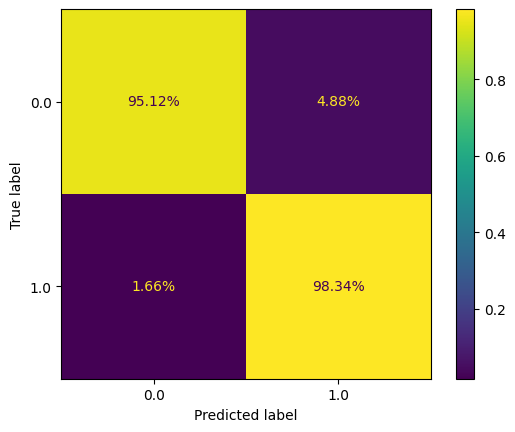

In [10]:
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [11]:
lr.coef_

array([[ 1.52195031e+01, -4.85464605e-01, -3.12260510e+00,
         2.46818479e-01,  1.52888104e-01, -7.60819886e-02,
        -4.73112707e-01,  1.96669852e-02,  9.52298772e-01,
        -3.71531809e-01,  1.39705242e-02]])

In [12]:
X_train.head()

,Income_log,Age,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness
0,0.064693,1.707128,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.585799,-0.385529,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0
2,0.166204,-1.597067,1.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0
3,-0.165435,1.321639,1.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0
4,1.047952,0.440520,2.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0


In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# With L1 penalty

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


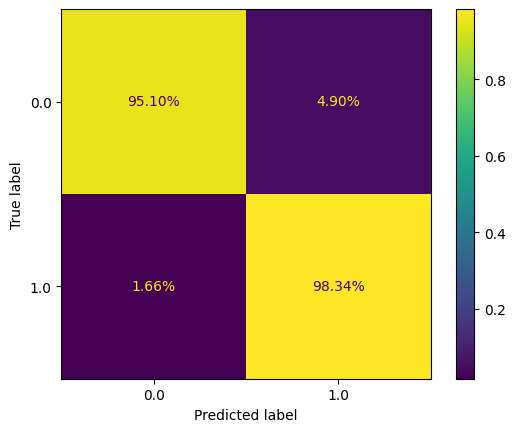

In [15]:
lr = LogisticRegression(penalty="l1", max_iter=10_000, n_jobs=-1, random_state=42, solver="liblinear")
lr.fit(X_train, y_train)
y_pred_valid = lr.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [16]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# With L2 penalty

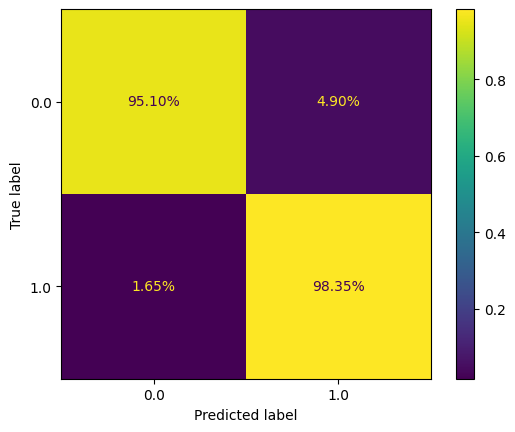

In [17]:
lr = LogisticRegression(penalty="l2", max_iter=10_000, n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
y_pred_valid = lr.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [18]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

In [30]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter" : [100, 1000, 10_000]
    },
    cv=5, 
    n_jobs=-1
)

In [31]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': [None, 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']})

In [32]:
gs.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

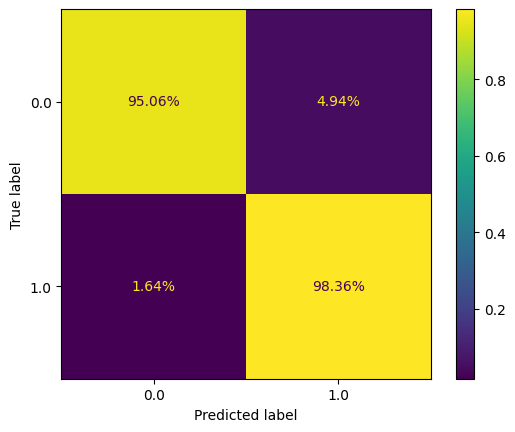

In [33]:
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [37]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9718080092805181)

In [38]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter" : [20, 50, 100]
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)
gs.best_params_

{'max_iter': 20, 'penalty': 'l2', 'solver': 'lbfgs'}

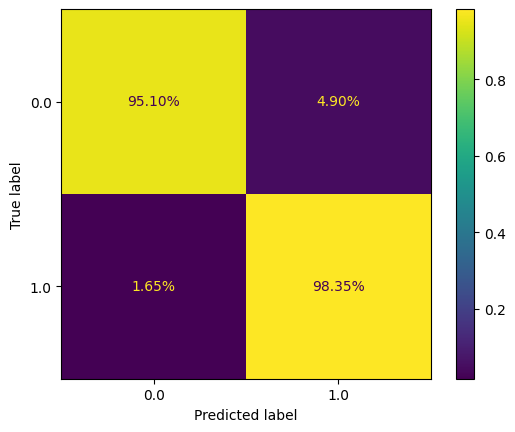

In [39]:
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [40]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9718684293206371)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:431: ConvergenceWarning: Newton solver did not converge after 5 iterations.
  warnings.warn(


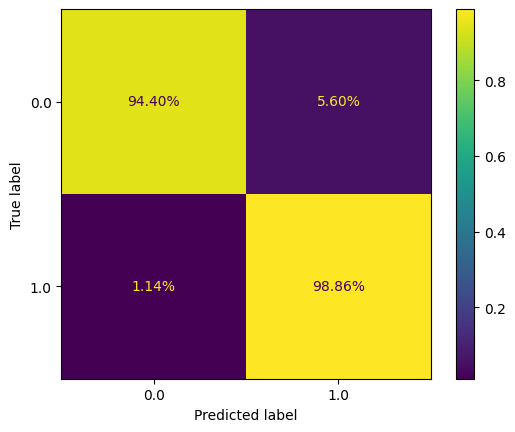

In [41]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter" : [5, 10, 15, 20]
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)

y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [42]:
np.mean(y_pred_valid == y_valid)

np.float64(0.9726538898421828)

In [43]:
gs.best_params_

{'max_iter': 5, 'penalty': None, 'solver': 'newton-cholesky'}

0.9726538898421828


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:431: ConvergenceWarning: Newton solver did not converge after 5 iterations.
  warnings.warn(


{'max_iter': 5, 'penalty': None, 'solver': 'newton-cholesky'}

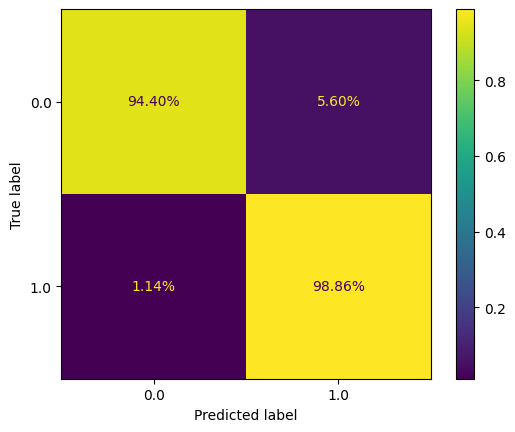

In [46]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
        "max_iter" : list(range(1, 6))
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")
print(np.mean(y_pred_valid == y_valid))
gs.best_params_

Accuracy = 0.9717959252724944


{'max_iter': 25, 'solver': 'liblinear'}

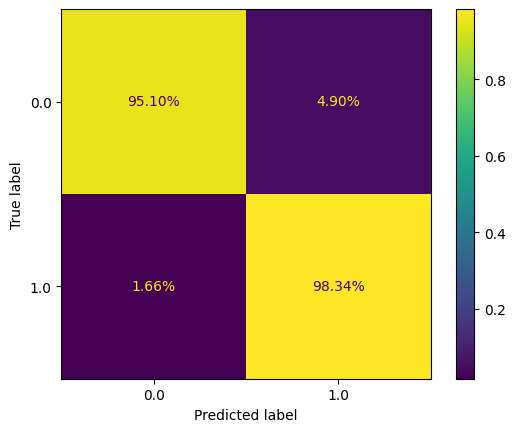

In [48]:
gs = GridSearchCV(
    estimator=LogisticRegression(penalty="l1"),
    param_grid={
        "solver" : ["liblinear", "saga"],
        "max_iter" : [5, 10, 25, 50, 100, 200]
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")
print(f"Accuracy = {np.mean(y_pred_valid == y_valid)}")
gs.best_params_

Accuracy = 0.9718925973366846


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'l1_ratio': np.float64(0.4), 'max_iter': 5}

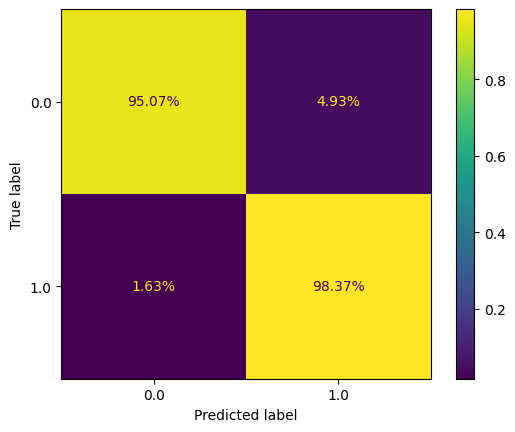

In [53]:
gs = GridSearchCV(
    estimator=LogisticRegression(solver="saga", penalty="elasticnet"),
    param_grid={
        "l1_ratio" : list(np.arange(0, 1, 0.05)),
        "max_iter" : [5, 10, 25, 50, 100, 200]
    },
    cv=5, 
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")
print(f"Accuracy = {np.mean(y_pred_valid == y_valid)}")
gs.best_params_

Accuracy = 0.971711337216328


{'l1_ratio': np.float64(0.25), 'max_iter': 3}

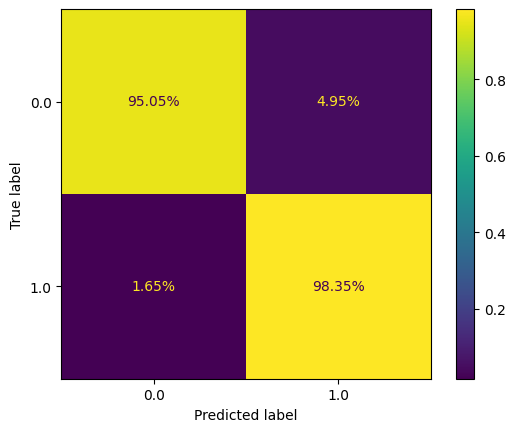

In [56]:
import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(
    estimator=LogisticRegression(solver="saga", penalty="elasticnet"),
    param_grid={
        "l1_ratio" : list(np.arange(0, 1, 0.01)),
        "max_iter" : [1, 2, 3, 4, 5, 7, 10, 20, 50]
    },
    cv=5,
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred_valid = gs.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")
print(f"Accuracy = {np.mean(y_pred_valid == y_valid)}")
gs.best_params_